# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [201]:
#A01635782
#Diego Enrique Vargas

# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [202]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [203]:
# Print dataset
dataset.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [204]:
# Print dataset shape
dataset.shape


(150, 5)

In [205]:
# Print column names
dataset.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [206]:
# Drop na
dataset.dropna(inplace = True)


3. Encoding the class label categorical column: from string to num


In [207]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
mapping = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset["Flower"] = dataset["Flower"].map(mapping)


#Visualize the dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [208]:
# Drop out non necesary columns
#All columns in this case are neccesary

5. Scatter plot of the data

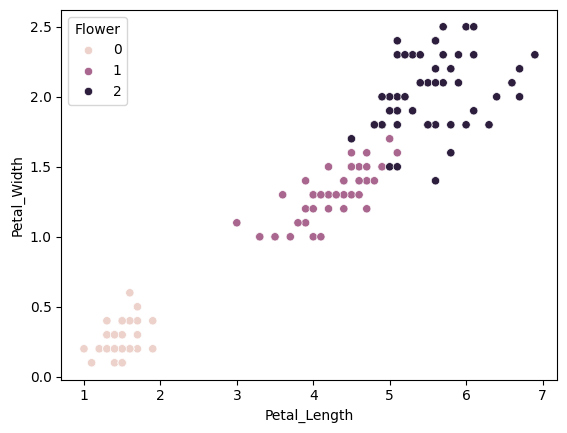

In [209]:
# Scatter plot of Petal_Length vs Petal_Width
sns.scatterplot(data = dataset, x = "Petal_Length", y = "Petal_Width", hue = "Flower")
plt.show()



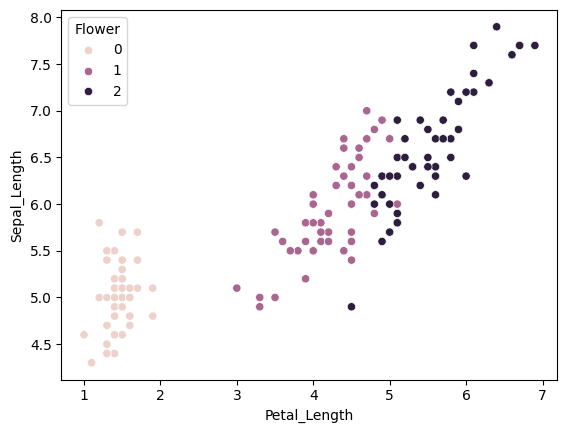

In [210]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(data = dataset, x = "Petal_Length", y = "Sepal_Length", hue = "Flower")
plt.show()



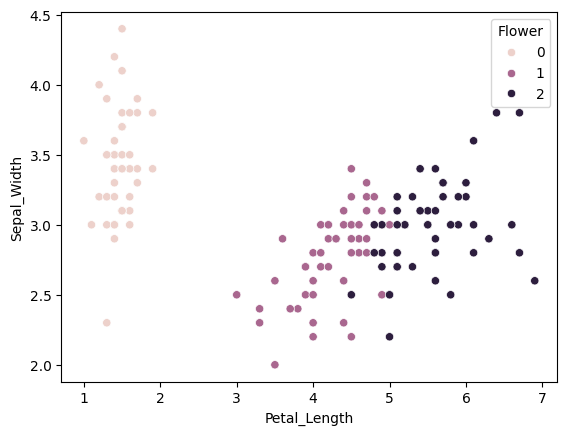

In [211]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(data = dataset, x = "Petal_Length", y = "Sepal_Width", hue = "Flower")
plt.show()



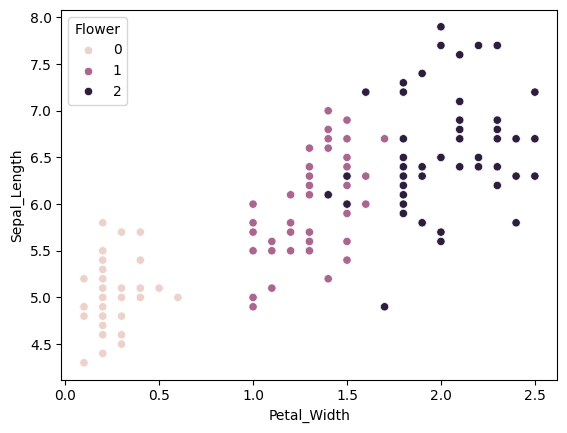

In [212]:
# Scatter plot of Petal_Width vs Sepal_Length

sns.scatterplot(data = dataset, x = "Petal_Width", y = "Sepal_Length", hue = "Flower")
plt.show()


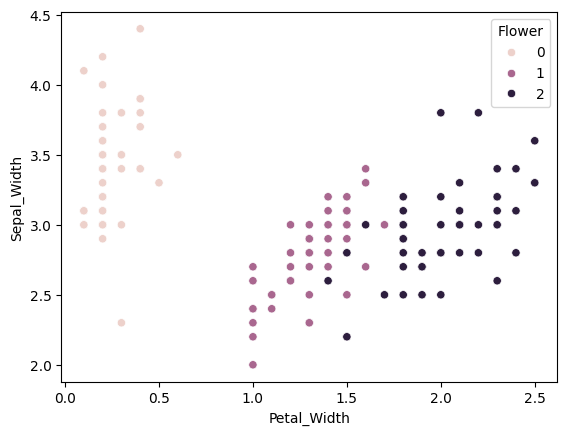

In [213]:
# Scatter plot of Petal_Width vs Sepal_Width
sns.  scatterplot(data = dataset, x = "Petal_Width", y = "Sepal_Width", hue = "Flower")
plt.show()



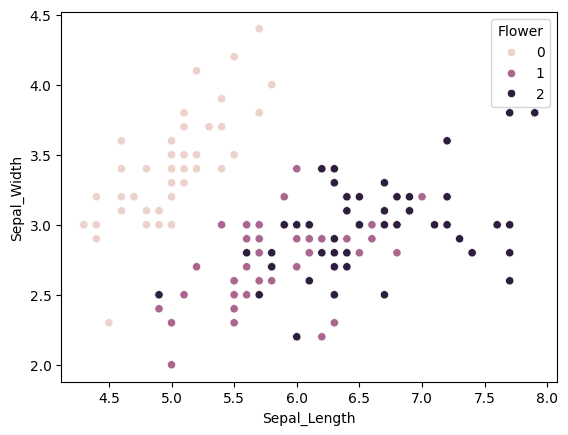

In [214]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(data = dataset, x = "Sepal_Length", y = "Sepal_Width", hue = "Flower")
plt.show()



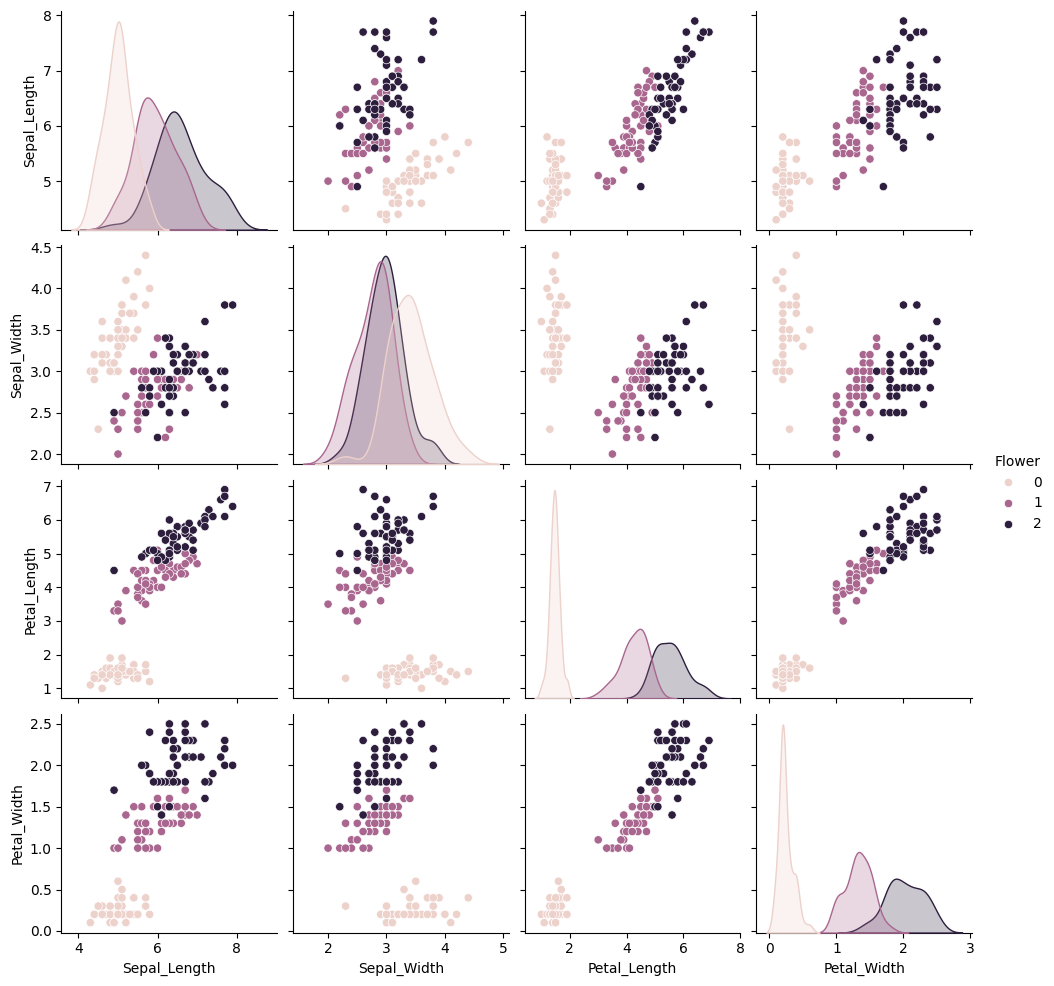

In [215]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset, hue = "Flower")
plt.show()



In [216]:
# Pairplot: Scatterplot of all variables (not the flower type)




6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [217]:
# Get dataframes for each real cluster
df0 = dataset[dataset["Flower"] == 0]
df1 = dataset[dataset["Flower"] == 1]
df2 = dataset[dataset["Flower"] == 2]


Text(0.5, 1.0, 'Virginica')

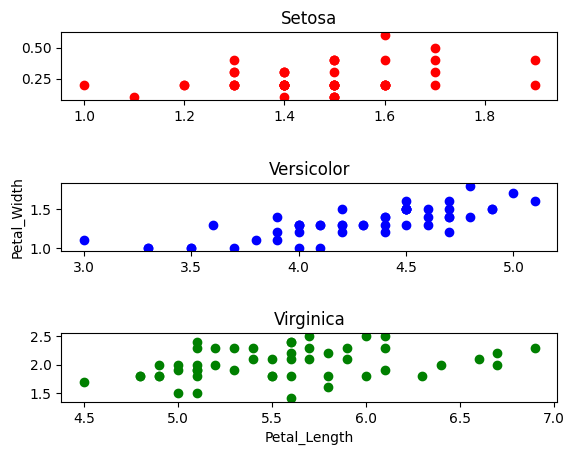

In [218]:
# Scatter plot of each real cluster for Petal
fig, ax = plt.subplots(3,1)
plt.subplots_adjust(hspace = 1.2)
ax[0].scatter(df0["Petal_Length"], df0["Petal_Width"], color = "red")
ax[1].scatter(df1["Petal_Length"], df1["Petal_Width"], color = "blue")
ax[2].scatter(df2["Petal_Length"], df2["Petal_Width"], color = "green")
ax[2].set_xlabel("Petal_Length")
ax[1].set_ylabel("Petal_Width")

ax[0].set_title("Setosa")
ax[1].set_title("Versicolor")
ax[2].set_title("Virginica")




Text(0.5, 1.0, 'Virginica')

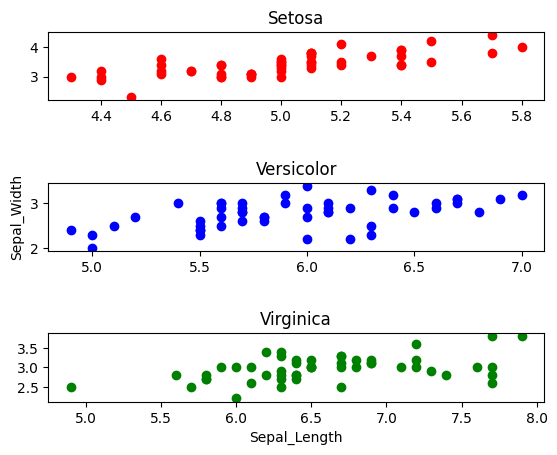

In [219]:
# Scatter plot of each real cluster for Sepal
fig, ax = plt.subplots(3,1)
plt.subplots_adjust(hspace = 1.2)
ax[0].scatter(df0["Sepal_Length"], df0["Sepal_Width"], color = "red")
ax[1].scatter(df1["Sepal_Length"], df1["Sepal_Width"], color = "blue")
ax[2].scatter(df2["Sepal_Length"], df2["Sepal_Width"], color = "green")
ax[2].set_xlabel("Sepal_Length")
ax[1].set_ylabel("Sepal_Width")

ax[0].set_title("Setosa")
ax[1].set_title("Versicolor")
ax[2].set_title("Virginica")


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [379]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [380]:
# Understand the data X
X.dtype

dtype('float64')

In [381]:
X.size

600

In [382]:
# Understand the data y
y.dtype

dtype('int64')

In [383]:
y.size

150

In [384]:
# Calculate the number of observations in the dataset
dataset.shape[0]


150

In [385]:
# Calculate the number of observations for class 0
dataset[dataset["Flower"] == 0].shape[0]


50

In [386]:
# Calculate the number of observations for class 1
dataset[dataset["Flower"] == 1].shape[0]

50

In [387]:
# Calculate the number of observations for class 2
dataset[dataset["Flower"] == 2].shape[0]


50

# Train a classifier

## Train the classification model

In [388]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
classifier = KNeighborsClassifier(n_neighbors = 3)

# Fit the model to the training data
classifier.fit(X, y)


KNeighborsClassifier(n_neighbors=3)

## Predict the class of a new observation

In [389]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[3.5, 1.5]])
#xnew = np.array([[6.5, 3.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [390]:
# Make the prediction using xnew
prediction = classifier.predict(xnew)

# Get the predicted class
print("Predicted class: ", prediction)



Predicted class:  [0]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [391]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split


# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 5)


In [392]:
# Number of observations in the train set
X_train.shape[0]


45

In [393]:
# Number of observations of each class in the train set
np.unique(y_train, return_counts = True)


(array([0, 1, 2]), array([16, 11, 18]))

In [394]:
# Number of observations in the test set
X_test.shape[0]


105

In [395]:
# Number of observations of each class in the test set
np.unique(y_test, return_counts = True)


(array([0, 1, 2]), array([34, 39, 32]))

## Train the classification model

In [396]:
# Initialize the classifier
classifier = KNeighborsClassifier(n_neighbors = 3)


# Fit the model to the training data
classifier.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

## Test the classification model

In [397]:
# Make the predictions using the test set
y_pred = classifier.predict(X_test)



In [398]:
# Explore real and predicted labels
print("Real labels: ", y_test)
print("Predicted labels: ", y_pred)


Real labels:  [1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1 2 1 2 2 0 2 0 0 0 0 1 1 1 1 2 1 2 2 1 0 1 0 1 2 1 2 1 2 1
 1 1 2 1 0 2 0 0 1 0 0 2 1 0 2 0 2 1 0 0 2 1 1 0 0 2 1 1 0 1 2]
Predicted labels:  [1 2 2 0 2 1 0 1 0 2 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1 1 1 2 2 0 1 0 0 0 0 1 1 1 1 2 1 2 2 1 0 1 0 1 2 1 2 1 2 1
 1 1 2 1 0 2 0 0 1 0 0 2 1 0 2 0 1 1 0 0 2 1 1 0 0 2 1 1 0 1 1]


## Compute the acurracy

In [399]:
# Define a function to compute accuracy
def accuracy(real, pred):
    return sum(y_test == y_pred) / float(real.shape[0])


In [400]:
# Calculate total accuracy
accuracy(y_test, y_pred)





0.9428571428571428

In [401]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



0.9428571428571428

In [402]:
# Compute accuracy for class 0
accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])


1.0

In [403]:
# Compute accuracy for class 1
accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])



0.9743589743589743

In [404]:
# Compute accuracy for class 2

accuracy_score(y_test[y_test == 2], y_pred[y_test == 2])


0.84375

## Confussion matrix

In [405]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, normalize = "true")

array([[1.        , 0.        , 0.        ],
       [0.        , 0.97435897, 0.02564103],
       [0.        , 0.15625   , 0.84375   ]])

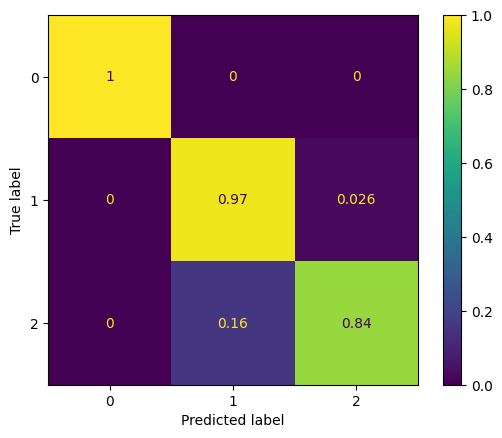

In [406]:
# Plot normalized confussion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, normalize = "true")
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

1.- I got the following results with the models using a test size of 70% and the seed 3:


*   Four variables: 0.97
*   Petal width and lenght: 0.97
*   Setal width and lenght: 0.75   


Using the four variables or the petal width and lenght provide mostly similar results. Using the setal width provides much more inaccurary.

2.- Using the same test size of 70% and the seed 3:


*   Using logistic regression we got the previous accuracy of 0.97
*   Using the Kneighbors classificator we got an accuracy of 0.94

Between these two logistic regression got the slightly better accuracy, although both are accurate due to the general good state of the data.




